# Observation Planning
Sophie Clark

Questions to ask when planning a photometric observing session ("run"):

1. [__Where is my target?__](#Where-is-my-target?)
2. [__When can I observe my target?__](#When-can-I-observe-my-target?)
    * [Questions: Non-computer-based answers](#Questions-to-Answer)
    * [Using Astroplan](#Answer-questions-with-astroplan)
    * [Time Zones](#Time-Zones)
    * [Airmass Plots](#Airmass-Plots)
3. [__How do I know when I've found my target (make a finder chart)?__](#How-do-I-know-when-I've-found-my-target?-Make-a-finder-chart)
    * [Planning for Clouds with a sky chart](#Planning-for-Clouds)
    * [Exercise: Do it yourself](#EXERCISE)
3. How long do I need to observe? [not today]
4. How will I calibrate my data? (Qualitative but not quantitative today)

## Where is my target? 

[Index](#Observation-Planning)

Let's pick a few exciting targets to look at. These could be stars, clusters, nebulae, etc.

1. Capella
2. Rho Cassiopeia
3. M1
4. Polaris

To find where these sources are on the sky, we can query a few databases, including the SESAME name resolver service (http://cds.u-strasbg.fr/cgi-bin/Sesame) and the SIMBAD service.  We can do this using `astropy`, the main library for astronomical analysis.


In [1]:
from astropy import coordinates, units

In [2]:
# this uses SESAME
capella_coord = coordinates.SkyCoord.from_name('Capella')
capella_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (79.17232794, 45.99799147)>

We can display this in other ways too:

In [3]:
capella_coord.to_string('hmsdms')

'05h16m41.3587s +45d59m52.7693s'

The SIMBAD service gives us a little additional information:

In [4]:
import astroquery

In [8]:
from astroquery.simbad import Simbad

In [9]:
capella_simbad = Simbad.query_object('Capella')
capella_simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* alf Aur,05 16 41.3587,+45 59 52.769,9,9,4.750,2.470,90,A,O,2007A&A...474..653V,1


Note that alpha Aur is another way of saying 'the brightest star in Auriga', which happens to be colloquially called Capella in English.

We'll just use SESAME for the others, though.  Fill in the SESAME approach for `rhocas` ("Rho Cassiopeia"), `M1` ("M1"), and `polaris` ("Polaris"):

(`coordinates.SkyCoord.from_name` uses SESAME to obtain the object's coordinates)

In [14]:
rhocas_coord = coordinates.SkyCoord.from_name('Rho Cassiopeia')
rhocas_coord
M1_coord = coordinates.SkyCoord.from_name('M1')
M1_coord
polaris_coord = coordinates.SkyCoord.from_name('Polaris')
polaris_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (37.95456067, 89.26410897)>

In [15]:
print(capella_coord.to_string('hmsdms'))
print(rhocas_coord.to_string('hmsdms'))
print(M1_coord.to_string('hmsdms'))
print(polaris_coord.to_string('hmsdms'))

05h16m41.3587s +45d59m52.7693s
23h54m23.034s +57d29m57.7669s
05h34m31.94s +22d00m52.2s
02h31m49.0946s +89d15m50.7923s


## When can I observe my target?

[Index](#Observation-Planning)

Next, knowing where these are on the sky, we can ask what times of year they are up at night.

We first have to define where _we_ are by setting the observatory location.

In [16]:
pip install astroplan

Note: you may need to restart the kernel to use updated packages.


In [17]:
from astroplan import Observer
from astropy import units as u # shortcut

In [18]:
# sometimes we have to update the database; if that's necessary, a message will pop up telling us
from astropy.utils import iers
iers.conf.IERS_A_URL = 'ftp://cddis.gsfc.nasa.gov/pub/products/iers/finals2000A.all'
iers.conf.IERS_A_URL_MIRROR = 'https://datacenter.iers.org/data/9/finals2000A.all'
from astroplan import download_IERS_A
download_IERS_A()

In [19]:
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory',
              )
CTO

<Observer: name='University of Florida Campus Teaching Observatory',
    location (lon, lat, el)=(-82.349004 deg, 29.643018 deg, 30.99999999950558 m),
    timezone=<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>>

Before we go on, we can use some information we already have in hand to determine approximately when we can observe these objects.  It is important to do this sort of qualitative 'sanity check' to ensure that the numbers coming from the computer are reasonable.

The March equinox defines the zero-point of the Right Ascension coordinate, which means that 12h RA goes overhead at midnight (0h RA goes overhead at noon).

# Questions to Answer

[Index](#Observation-Planning)

There are 24 hours in a day and 12 months in a year.  By how many hours does the sky rotate each month?

A: 24 hours/day * ~30 days/month = 720 hours/month

How many degrees?

A: 720 hours/month * 15 degrees/hour = 10800 degrees/month

Given the above information, answer the following questions:

1. What is the Right Ascension of the Sun in the March (vernal) equinox?

A: 0h

2. What is the RA of the Sun at the September (autumnal) equinox?

A: 12h

3. During what season or month do our targets reach zenith at midnight? (one answer per target)

A:
* Capella: late fall - early winter
* Rho Cas: Late summer - early fall
* M1: late fall - early winter
* Polaris: Never reaches the zenith since it is aligned with the northern celestial pole, around 30 degrees in Gainesville.

Having done these checks, we can proceed to get more precise answers.

We create `target` objects to observe at different times.

## Answer questions with astroplan

[Index](#Observation-Planning)

In [41]:
from astroplan import FixedTarget

In [21]:
capella_target = FixedTarget(capella_coord, name="Capella")
rhocas_target = FixedTarget(rhocas_coord, name="Rho Cas")
M1_target = FixedTarget(M1_coord, name="M1")
polaris_target = FixedTarget(polaris_coord, name="Polaris")
capella_target, rhocas_target, M1_target, polaris_target

(<FixedTarget "Capella" at SkyCoord (ICRS): (ra, dec) in deg (79.17232794, 45.99799147)>,
 <FixedTarget "Rho Cas" at SkyCoord (ICRS): (ra, dec) in deg (358.59597498, 57.4993797)>,
 <FixedTarget "M1" at SkyCoord (ICRS): (ra, dec) in deg (83.63308333, 22.0145)>,
 <FixedTarget "Polaris" at SkyCoord (ICRS): (ra, dec) in deg (37.95456067, 89.26410897)>)

To determine the observability of an object, we ask whether the object is "up" (in the sky, as opposed to underfoot), and whether it is night time.

What time are you working on this notebook?  Is it night?  Are the target sources "up"?  (answer these before filling out the code)

It is mid-afternoon/evening; I am working on this notebook at approximately 4:33 PM so it is not night, and most of the target sources are not up. Polaris is always up in Gainesville, but is not visible since it's not night.

<your answer here>

Since the answers to all of our questions depend on both the time of day and the time of year, we need to define our time.

In [28]:
from astropy.time import Time

In [29]:
now = Time.now()
now

<Time object: scale='utc' format='datetime' value=2022-01-25 21:38:37.808375>

Are any of these sources "up"?  Astroplan will tell us:

In [30]:
CTO.target_is_up(now, [capella_target, rhocas_target, M1_target, polaris_target])

array([ True,  True,  True,  True])

At least some are "up" at the time of writing.

OK, but is it night?

In [31]:
CTO.is_night(now)

False

For planning purposes, we care more about what the future holds and how we're going to schedule our time, so we want to know when sunrise and sunset are.  We use `now` to tell the software that we care about sunrise and sunset _today_; we can put in future days to find out how sunrise/sunset times change.

In [32]:
CTO.sun_set_time(now), CTO.sun_rise_time(now)

(<Time object: scale='utc' format='jd' value=2459605.456332804>,
 <Time object: scale='utc' format='jd' value=2459605.0184860528>)

These aren't formatted in a very familiar way, so we can use a standard format - e.g., ISO, the International Standards Organization format - to show them more nicely:

In [33]:
CTO.sun_set_time(now).iso, CTO.sun_rise_time(now).iso

('2022-01-25 22:57:07.154', '2022-01-25 12:26:37.195')

Those times look a bit funny because they're in UTC, Universal Coordinated Time.

### Time Zones

[Index](#Observation-Planning)

Time zones are tricky, so we rely on libraries to help us with them.

In [34]:
now.to_datetime(timezone=CTO.timezone).isoformat()

'2022-01-25T16:38:37.808375-05:00'

That's a pretty verbose way to ask for and display this, so we can define a shortcut to get the time of day in the Eastern time zone:

In [35]:
def eastern(time):
    est = time.to_datetime(timezone=CTO.timezone)
    
    return est.strftime('%H:%M:%S')

In [36]:
(eastern(CTO.sun_set_time(now)), eastern(CTO.sun_rise_time(now)))

('17:57:07', '07:26:37')

Now you can see that sunset is around 6 PM and sunrise is around 7:30 AM.  Note that we have sunset first, sunrise second, because we care about the interval between the sun going down and coming back up again, not the daytime.

We need to know the sun's rise and set time to avoid it, but we also can ask when our sources rise and set.

In [37]:
(eastern(CTO.target_rise_time(time=now, target=capella_target)),
 eastern(CTO.target_set_time(time=now, target=capella_target)))

('13:03:01', '05:53:23')

In [38]:
(eastern(CTO.target_rise_time(time=now, target=rhocas_target)),
 eastern(CTO.target_set_time(time=now, target=rhocas_target)))

('05:50:34', '02:17:57')

In [39]:
(eastern(CTO.target_rise_time(time=now, target=M1_target)),
 eastern(CTO.target_set_time(time=now, target=M1_target)))

('14:51:37', '04:35:52')

In [42]:
### Note: this will fail!  "Comment it out" and move on
((CTO.target_rise_time(time=now, target=polaris_target)),
 (CTO.target_set_time(time=now, target=polaris_target)))

(<Time object: scale='utc' format='jd' value=nan>,
 <Time object: scale='utc' format='jd' value=nan>)

What's going on with that last one?  Since Polaris is the North Star, it is always observable from any northern observatory.  It has no rise and set time!

## Airmass Plots

[Index](#Observation-Planning)


We can visualize the "up time" for the targets using an _airmass plot_, which plots the airmass versus time of night.

[Airmass](https://en.wikipedia.org/wiki/Air_mass_(astronomy)) is the path length of air through which we're observing, and it is usually approximated as secant(zenith angle) and measured relative to zenith.


1 airmass is straight up, and is the minimum amount of atmosphere through which you can observe.

Generally, it is best to observe at airmass < 2 when possible.  Airmass up to ~3 can be useful.  Beyond that, serious complications tend to arise.

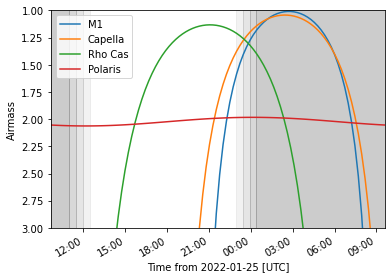

In [43]:
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 

plot_airmass([M1_target, capella_target, rhocas_target, polaris_target],
             observer=CTO,
             time=now,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

Note: if you get some warnings here about linestyles being redundantly defined, feel free to ignore them, since you haven't defined a linestyle explicitly, it's not your fault. 

Note that the X-axis is in Universal Coordinated Time (UTC).  If you want the plots in local time, you can request that the local timezone be used (but only for certain versions of astroplan):

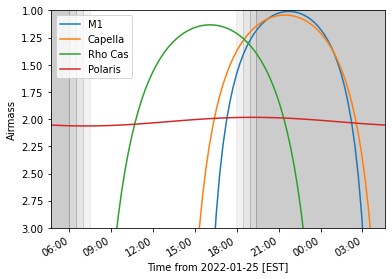

In [44]:
# if this fails, comment it out and continue
plot_airmass([M1_target, capella_target, rhocas_target, polaris_target],
             observer=CTO,
             time=now.to_datetime(timezone=CTO.timezone),
             use_local_tz=True,
             brightness_shading=True)

plt.legend(loc='best')
plt.show() 

Answer some questions:

Which sources are up at night?  For how long is each source observable at airmass $\lesssim2$?  (Polaris is close enough to 2 to consider it observable)

All four sources are up at night. 

Each source is observable at airmass $\lesssim2$ for different amounts of time:
- M1: about 6.5 hours
- Capella: about 7.3 hours
- Rho Cas: about 3 hours
- Polaris: about 12 hours (visible when it is night)

## How do I know when I've found my target? Make a finder chart

[Index](#Observation-Planning)

We need to know how to tell we're 'on target' when we've pointed our telescope at the right part of the sky.  With binoculars and other very wide field-of-view instruments, we can use known asterisms or constellations to navigate by, but with narrow field-of-view professional telescopes, we have to use fainter stars to aid our pointing.

We can obtain finder charts from the many public astronomical archives, like the Digitized Sky Survey, which carefully logged the whole sky in visible light images.

`astroplan` provides a means to obtain these images and plot them.  It uses `astroquery`, another library, to query the `SkyView` image cutout service.

In [45]:
from astroplan.plots import plot_finder_image

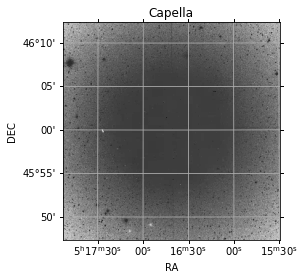

In [46]:
ax, hdu = plot_finder_image(capella_target, survey='DSS', fov_radius=25*u.arcmin)

Again, you may get some errors warning you about gca() keywords. This is again, someone else's problem for now. 

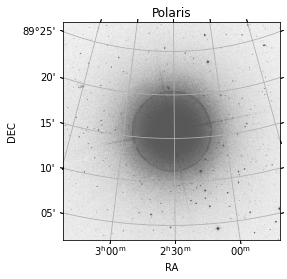

In [47]:
ax, hdu = plot_finder_image(polaris_target, survey='DSS', fov_radius=25*u.arcmin)

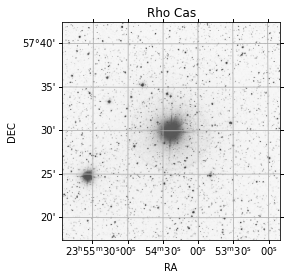

In [48]:
ax, hdu = plot_finder_image(rhocas_target, survey='DSS', fov_radius=25*u.arcmin)

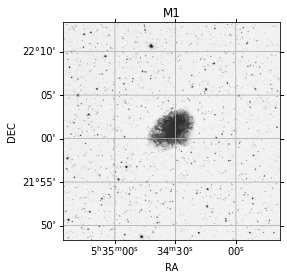

In [49]:
ax, hdu = plot_finder_image(M1_target, survey='DSS', fov_radius=25*u.arcmin)

You might notice these images come out a little smaller than you would like.  You can control the figure size using matplotlib commands:

In [50]:
import matplotlib.pyplot as pl

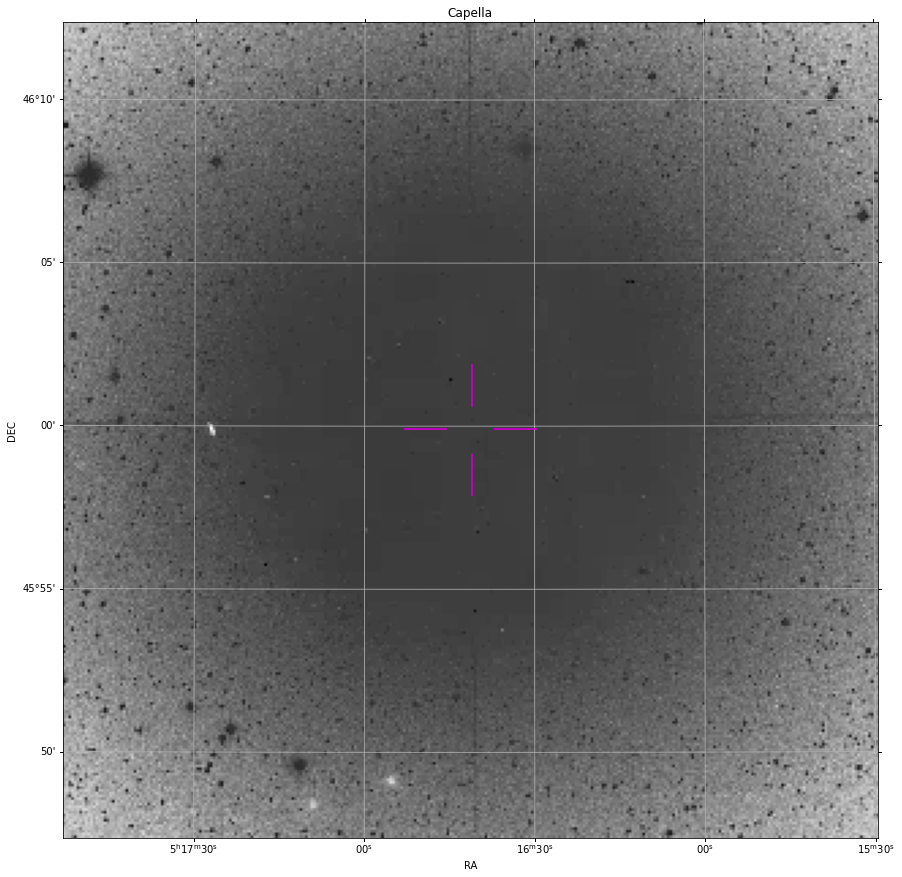

In [51]:
# specify the figure size in inches
pl.figure(figsize=(15, 15))
# a "reticle" is a set of crosshairs highlighting the target source
ax, hdu = plot_finder_image(capella_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)

Question: Why does this finder chart look like this? Hint: How bright is Capella?

Capella is very bright so its light blacks out most of the image.

## Planning for Clouds

[Index](#Observation-Planning)

What if the night is cloudy?  For professional observations, we will often write off cloudy nights as a lost cause, but for this class, sometimes we need to find the holes in the clouds and observe whatever's there! 

We can enable this by making sky charts.

In [52]:
from astroplan.plots import plot_sky

In [53]:
# first, let's find out where the objects are at sunset
sunset = CTO.sun_set_time(now)
# then, let's look 1 hour after sunset
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour

<PolarAxesSubplot:>

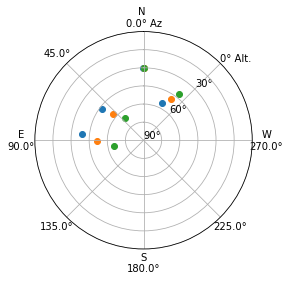

In [54]:
targets = [M1_target, capella_target, rhocas_target, polaris_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

In the star chart, the colors represent different times.  One of the points only shows the final color (maybe you can see some others behind it).  Why isn't it moving?

A:That point represents Polaris, which will remain near the Northern celestial pole and thus will not appear to move on the sky chart. 

# EXERCISE

[Index](#Observation-Planning)

Create an altitude plot (showing the 'up time'), a sky chart, and a finder chart for each of the following sources:
1. M82
2. M44
3. M45
4. NGC 884

In [2]:
from astropy import coordinates, units
M82_coord = coordinates.SkyCoord.from_name('M82')
M44_coord = coordinates.SkyCoord.from_name('M44')
M45_coord = coordinates.SkyCoord.from_name('M45')
NGC884_coord = coordinates.SkyCoord.from_name('NGC 884')

In [4]:
from astroplan import FixedTarget
M82_target = FixedTarget(M82_coord, name="M82")
M44_target = FixedTarget(M44_coord, name="M44")
M45_target = FixedTarget(M45_coord, name="M45")
NGC884_target = FixedTarget(NGC884_coord, name="NGC 884")

In [17]:
NGC884_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (35.584, 57.149)>

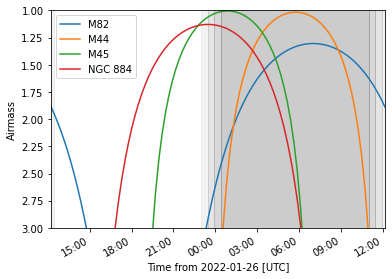

In [13]:
from astroplan.plots import plot_airmass 
import matplotlib.pyplot as plt 
from astroplan import Observer
from astropy import units as u
from astropy.time import Time
now = Time.now()
CTO = Observer(location=coordinates.EarthLocation(lat=29.643018, lon=-82.349004*u.deg, height=31*u.m),
               timezone='US/Eastern',
               name='University of Florida Campus Teaching Observatory')
plot_airmass([M82_target, M44_target, M45_target, NGC884_target],
             observer=CTO,
             time=now,
             brightness_shading=True)

plt.legend(loc='best')
plt.show()

<PolarAxesSubplot:>

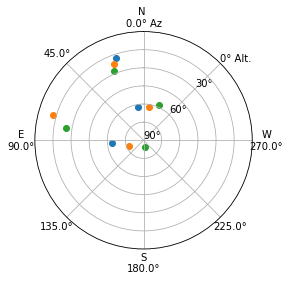

In [15]:
from astroplan.plots import plot_sky
sunset = CTO.sun_set_time(now)
onehour_after_sunset = sunset + 1*u.hour
twohours_after_sunset = sunset + 2*u.hour
targets = [M82_target, M44_target, M45_target, NGC884_target]
plot_sky(target=targets, observer=CTO, time=sunset)
plot_sky(target=targets, observer=CTO, time=onehour_after_sunset)
plot_sky(target=targets, observer=CTO, time=twohours_after_sunset)

In [24]:
from astroplan.plots import plot_finder_image
import matplotlib.pyplot as pl

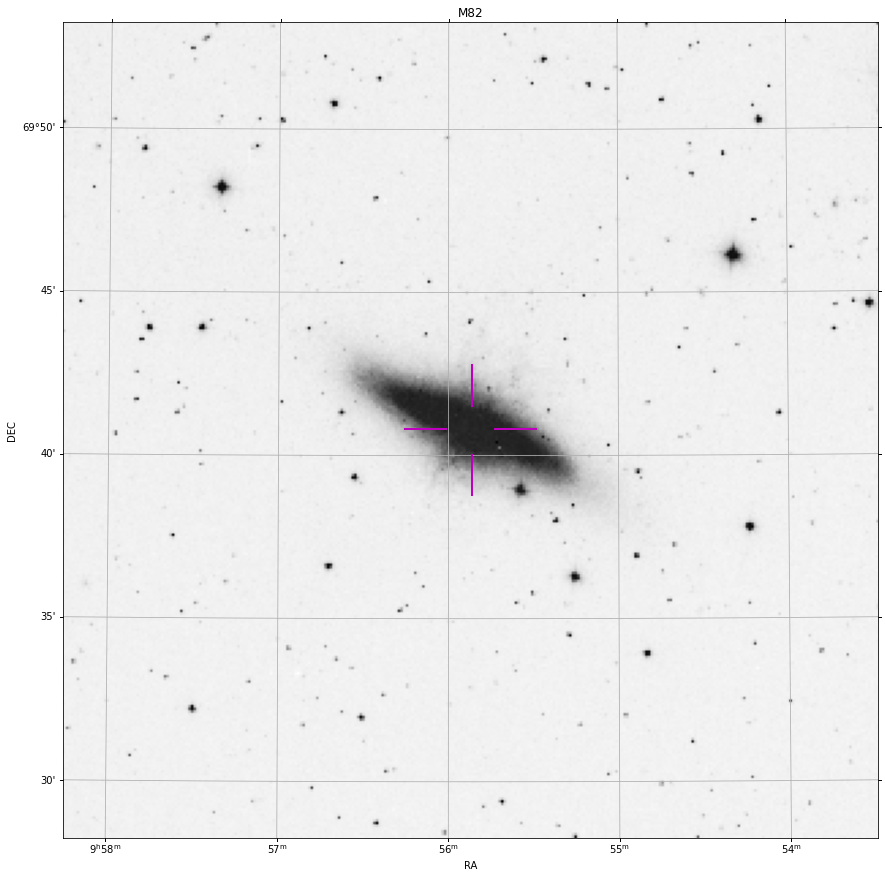

In [26]:
pl.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(M82_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)

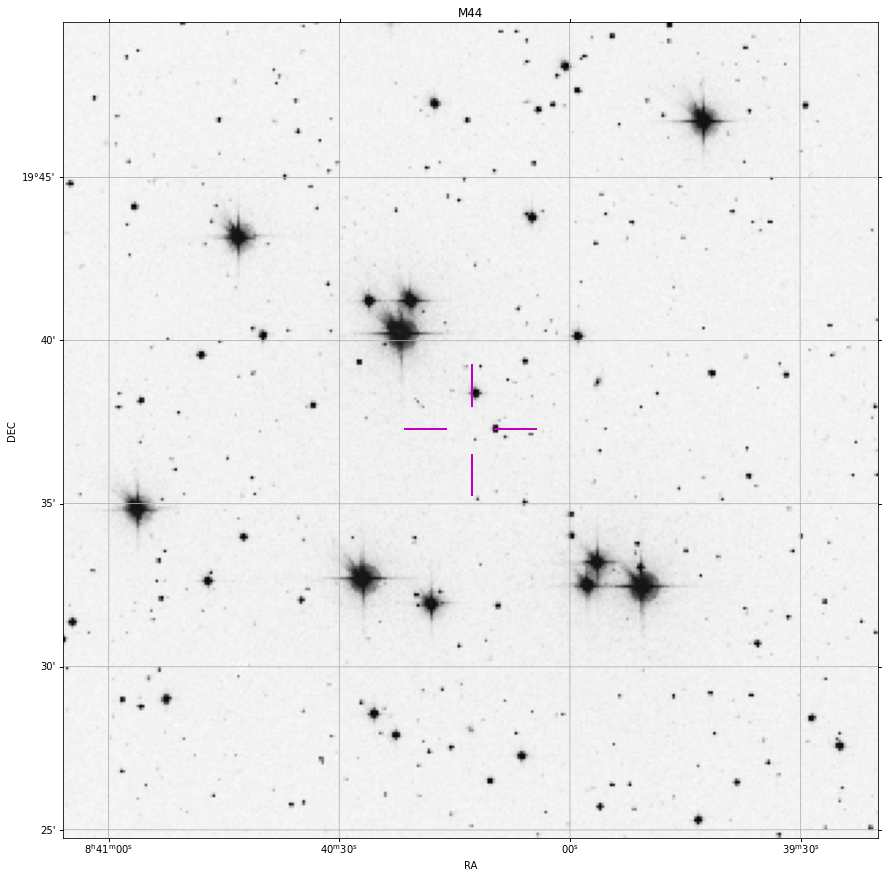

In [27]:
pl.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(M44_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)

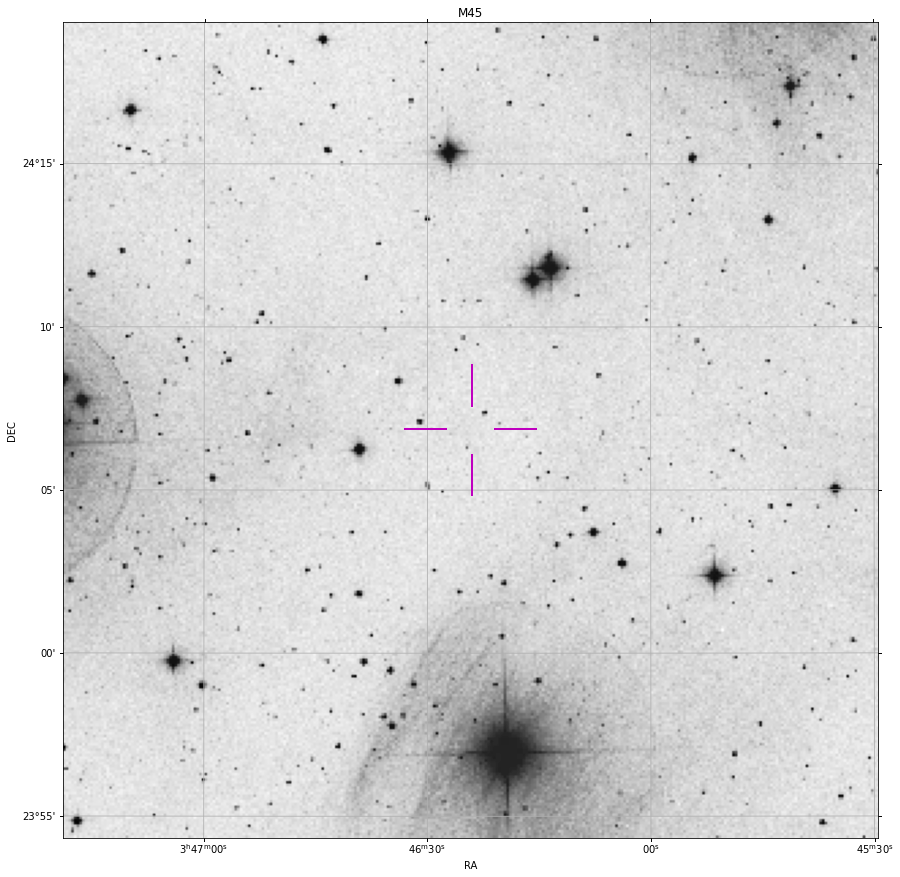

In [28]:
pl.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(M45_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)

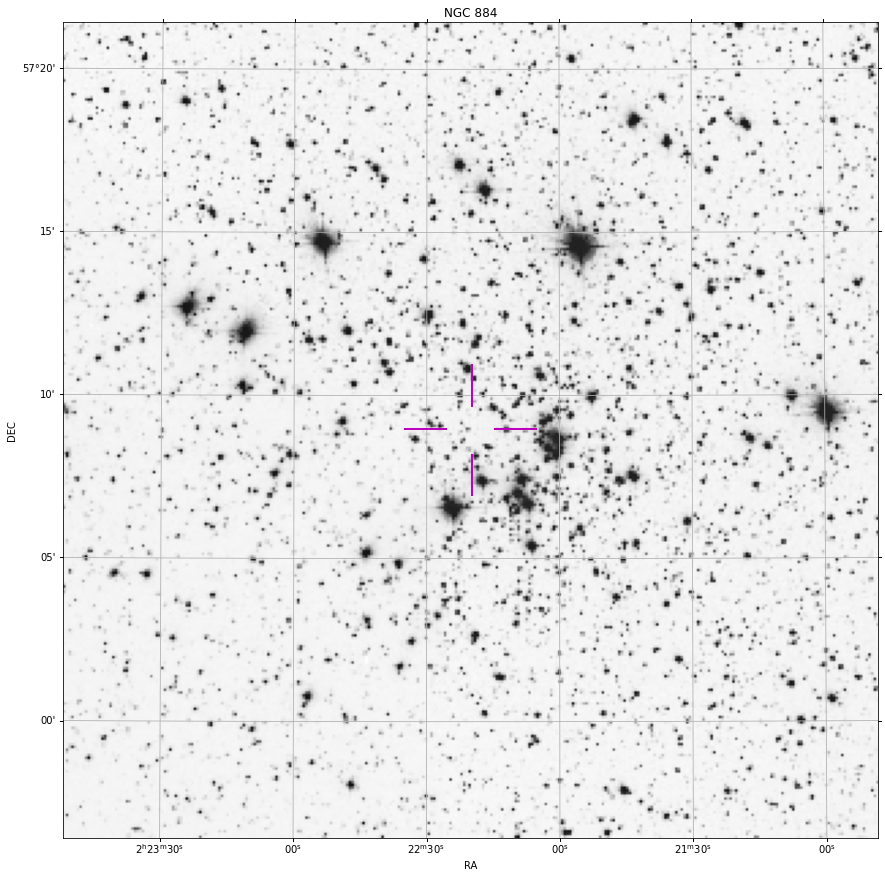

In [29]:
pl.figure(figsize=(15, 15))
ax, hdu = plot_finder_image(NGC884_target, survey='DSS', fov_radius=25*u.arcmin, reticle=True)